In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Data visualisation 
import matplotlib.pyplot as plt # Data visualisation 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.



import shap



In [2]:
data = pd.read_csv(r'C:\Users\OOlajide\Working Folder\All Python Data\TriageBalanced.csv')

In [3]:
data.head()

,Order_ID,VISIT_ID,ARRIVAL_DATE,Urgent_c,Urgent,Transport,Age,Gender,Visit_Reason,REFER_SOURCE,AVPU,PulseRate,RespiratoryRate,SP02,Temperature
0,1,V2-B20200810075626424,10/08/2020,MINOR,0,Other,3,female,Allergy (Including Anaphylaxis),SELF,Alert,127,20,95,36.8
1,1,V2-B20200809220138629,09/08/2020,MINOR,0,Other,1,male,Infectious Disease,OTHER,Alert,146,56,96,37.8
2,1,V2-B20200809214530394,09/08/2020,MINOR,0,Other,0,female,Diagnosis Not Classifiable,SELF,Alert,168,40,100,36.9
3,1,V2-B20200809201657488,09/08/2020,MINOR,0,Other,0,male,Gastrointestinal Conditions,SELF,Alert,139,40,97,37.0
4,1,V2-B20200809194603552,09/08/2020,MINOR,0,Other,12,female,Other Vascular Conditions,SELF,Alert,88,22,100,36.8


# Experiment 1

In [5]:
# Imporing pycaret classification method
from pycaret.classification import *

# Experiment 2

In [6]:
s2 = setup(data, target = 'Urgent',
            ignore_features=['Order_ID', 'VISIT_ID', 'ARRIVAL_DATE','Urgent_c'], session_id = 123,
           normalize = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(358569, 15)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
lr = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8963,0.9406,0.9240,0.9207,0.9223,0.7662,0.7662
1,0.8950,0.9384,0.9196,0.9227,0.9211,0.7642,0.7642
2,0.8953,0.9406,0.9241,0.9193,0.9217,0.7638,0.7639
3,0.8936,0.9415,0.9232,0.9177,0.9204,0.7598,0.7598
4,0.9025,0.9436,0.9307,0.9236,0.9271,0.7798,0.7798
5,0.8987,0.9448,0.9228,0.9250,0.9239,0.7722,0.7723
6,0.8983,0.9433,0.9263,0.9216,0.9239,0.7706,0.7706
7,0.8964,0.9426,0.9254,0.9196,0.9225,0.7661,0.7661
8,0.8986,0.9423,0.9216,0.9259,0.9238,0.7724,0.7724
9,0.8972,0.9412,0.9215,0.9240,0.9228,0.7689,0.7689


In [8]:
new_prediction = predict_model(lr)

new_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8991,0.9435,0.9261,0.9227,0.9244,0.7725,0.7725


,PulseRate,RespiratoryRate,SP02,Temperature,Transport_Ambulance,Transport_Helicopter,Transport_Other,Age_0,Age_1,Age_10,...,REFER_SOURCE_CONS IN HOSP,REFER_SOURCE_OTHER,REFER_SOURCE_SELF,AVPU_Alert,AVPU_Pain,AVPU_Unresponsive,AVPU_Verbal,Urgent,Label,Score
0,169.0,40.0,100.0,37.9,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,0.3153
1,135.0,28.0,95.0,37.5,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9605
2,100.0,18.0,100.0,36.5,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9244
3,131.0,40.0,98.0,36.5,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.8890
4,149.0,82.0,97.0,36.9,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9962


In [10]:
predictions = new_prediction['Score'][4]
predictions

0.9962

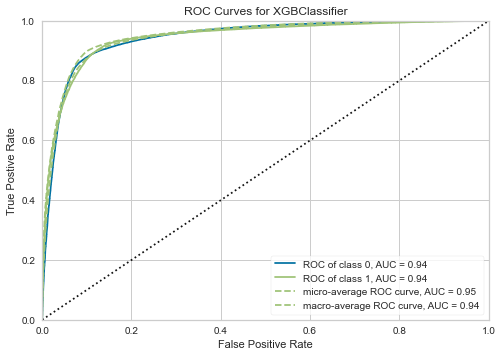

In [11]:
plot_model(lr)

In [12]:
save_model(lr, 'deployment_28042020_classification')

Transformation Pipeline and Model Succesfully Saved


In [13]:
deployment_28042020_classification = load_model('deployment_28042020_classification')

Transformation Pipeline and Model Sucessfully Loaded


In [14]:
deployment_28042020_classification

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Order_ID', 'VISIT_ID',
                                                        'ARRIVAL_DATE',
                                                        'Urgent_c'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Urgent',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_var...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()), ('dummy', Dummify(target='Urgent')),
                 ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs', Empty()), ('pca', Empty())],
          verbose=False),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=-1, num_parallel_tree=1,
               objective='binary:logistic', random_state=123, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=0)]

In [14]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
